In [143]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
campanias = pd.read_csv("ib_base_campanias.csv")
digital =pd.read_csv("ib_base_digital.csv")
rcc = pd.read_csv("ib_base_rcc.csv")
reniec = pd.read_csv("ib_base_reniec.csv")
vehicular = pd.read_csv("ib_base_vehicular.csv")
sunat = pd.read_csv("ib_base_sunat.csv")
train = pd.read_csv("ib_base_inicial_train.csv")
test = pd.read_csv("ib_base_inicial_test.csv")

In [145]:
test["prediction_id"].nunique()

178685

In [146]:
train

,codmes,id_persona,codtarget,margen,cem,ingreso_neto,linea_ofrecida
0,201901,165747,0,-5.00000,1.0,1781.0,1700
1,201903,100117,0,-5.00000,478.0,2106.0,2100
2,201901,65751,1,342.99000,687.0,3083.0,4600
3,201901,58047,0,-5.00000,182.0,1814.0,3600
4,201901,113221,0,-5.00000,582.0,2153.0,4300
5,201903,247481,0,-5.00000,344.0,1325.0,1300
6,201902,2651,0,-5.00000,4507.0,9344.0,23300
7,201902,5164,0,-5.00000,310.0,3166.0,6300
8,201902,81364,0,-5.00000,791.0,1870.0,1800
9,201901,142634,0,-5.00000,4058.0,7342.0,33000


In [147]:
digital["id_persona"].nunique()

23092

In [148]:
digital_ = digital.groupby(by="id_persona").sum()
digital_.drop(columns=["android", "iphone"], inplace=True)
digital_

,codday,simu_prestamo,benefit,email,facebook,goog,youtb,compb,movil,desktop,...,n_sesion,busqtc,busqvisa,busqamex,busqmc,busqcsimp,busqmill,busqcsld,busq,n_pag
id_persona,,,,,,,,,,,,,,,,,,,,,
20,302856100,0.0,0,0,15,0,0,0,15,0,...,15,0,0,0,0,0,0,0,0,110
26,161522502,0.0,0,0,8,0,0,0,8,0,...,8,0,0,0,0,0,0,0,0,28
78,121142412,0.0,0,0,8,0,0,0,8,0,...,8,0,0,0,0,0,0,0,0,24
88,60570945,0.0,0,3,0,0,0,0,0,3,...,3,0,0,0,0,0,0,0,0,42
139,40380412,0.0,0,0,0,2,0,0,0,2,...,2,0,0,0,0,0,0,0,0,12
173,80760858,0.0,0,4,0,0,0,0,4,0,...,4,0,0,0,0,0,0,0,0,4
181,40380844,0.0,0,0,0,2,0,0,2,0,...,2,0,0,0,0,0,0,0,0,6
210,1211416436,0.0,0,8,0,12,0,0,0,68,...,68,0,0,0,0,0,0,0,0,152
217,80761632,0.0,0,0,4,0,0,0,4,0,...,4,0,0,0,0,0,0,0,0,6


In [149]:
campanias_ = campanias.groupby(by="id_persona").count()
campanias_.drop(columns=["codmes"], inplace=True)
campanias_

,producto,canal_asignado
id_persona,,
1,24,24
2,3,3
3,15,15
4,19,17
5,19,17
7,5,5
8,8,7
9,23,17
10,39,35


In [150]:
rcc_ = rcc.groupby(by="id_persona").mean()

In [151]:
rcc_.drop(columns=["codmes","cod_banco","clasif"], inplace=True)

In [152]:
rcc_

,mto_saldo,rango_mora
id_persona,,
1,4723.769674,1.000000
2,7762.012233,1.000000
3,1108.590501,1.000000
4,3112.636050,1.000000
5,7701.043197,1.000000
6,623.181436,2.928571
7,1376.594776,1.000000
8,13992.095238,1.000000
9,706.392362,1.000000


In [153]:
rcc_2 =rcc

In [154]:
rcc_2.head()

,codmes,id_persona,cod_banco,producto,clasif,mto_saldo,rango_mora
0,201811,10155,29,PRESTAMOS COMERCIALES,0.0,36698.4870,1.0
1,201804,75442,29,PRESTAMO PERSONAL,0.0,7971.1182,1.0
2,201902,172772,29,PRESTAMOS COMERCIALES,0.0,821.6077,1.0
3,201810,187572,29,PRESTAMOS COMERCIALES,0.0,9271.8030,1.0
4,201903,255598,29,PRESTAMOS COMERCIALES,0.0,10548.7263,1.0


In [155]:
bancos = rcc_2["cod_banco"].unique()
productos = rcc_2["producto"].unique()
print(bancos, productos)

[29 28 30 31 46 45 48 49 47 50 44 43 32 40 36 39 82 84 81 55 57 66 67 64
 68 71 69 27 33 12  3  2  4  5 24 22 20 17 18 16 14  8  7 38 23 62 60 59
 34 83  1 52 54 51 53 42 10 75 77 78 76 74 11  9 35 79 58 56 80 15 72 61
 21 25 41 65 70  6 73 63 37 13 26 19] ['PRESTAMOS COMERCIALES' 'PRESTAMO PERSONAL' 'RESTO RD'
 'HIPOTECARIO REGULAR' 'TARJETAS COMPRAS' 'TARJETAS OTROS CONCEPTOS'
 'TARJETAS EFECTIVO' 'LINEA TOTAL TC' 'HIPOTECARIO MIVIVIENDA' 'VEHICULAR'
 'OTROS CREDITOS' 'CARTAS FIANZAS OTORGADAS' 'CREDITOS CASTIGOS'
 'TARJETA_EMP SIN DEFINIR' 'CREDITO CASTIGADOS SIENDO AMORTIZADOS'
 'TARJETAS SIN DEFINIR' 'CREDITO INMOBILIARIOS' 'REFINANCIADOS'
 'TARJETA_EMP OTROS CONCEPTOS' 'TARJETA_EMP EFECTIVO' 'TARJETA_EMP COMPRA'
 'LEASING' 'SOBREGIRO' 'RESTO RI' 'FACTORING' 'DERIVADOS ME -- FORWARDS'
 'AVANCE' 'DESCUENTOS' 'FINANC COMEX' 'CARTAS DE CREDITO OTORGADAS'
 'DERIVADOS ME -- OPCIONES']


In [156]:
cleanup = {"producto":     {'PRESTAMOS COMERCIALES':1, 'PRESTAMO PERSONAL':2, 'RESTO RD':3,
 'HIPOTECARIO REGULAR':4, 'TARJETAS COMPRAS':5, 'TARJETAS OTROS CONCEPTOS':6,
 'TARJETAS EFECTIVO':7, 'LINEA TOTAL TC':8, 'HIPOTECARIO MIVIVIENDA':9, 'VEHICULAR':10,
 'OTROS CREDITOS':11, 'CARTAS FIANZAS OTORGADAS':12, 'CREDITOS CASTIGOS':13,
 'TARJETA_EMP SIN DEFINIR':14, 'CREDITO CASTIGADOS SIENDO AMORTIZADOS':15,
 'TARJETAS SIN DEFINIR':16, 'CREDITO INMOBILIARIOS':17, 'REFINANCIADOS':18,
 'TARJETA_EMP OTROS CONCEPTOS':19, 'TARJETA_EMP EFECTIVO':20, 'TARJETA_EMP COMPRA':21,
 'LEASING':22, 'SOBREGIRO':23, 'RESTO RI':24, 'FACTORING':25, 'DERIVADOS ME -- FORWARDS':26,
 'AVANCE':27, 'DESCUENTOS':28, 'FINANC COMEX':29, 'CARTAS DE CREDITO OTORGADAS':30,
 'DERIVADOS ME -- OPCIONES':31},
                }

In [157]:
rcc_2.replace(cleanup, inplace=True)

In [158]:
reniec_ = reniec.drop(columns=["soc_var6", "soc_var1"])

In [159]:
vehicular_ = vehicular.groupby(by='id_persona').count()

In [160]:
vehicular_.drop(columns=["veh_var1", "veh_var2"], inplace=True)

In [161]:
vehicular_

,marca
id_persona,
6,1
17,1
24,1
29,1
31,1
34,1
38,1
41,1
47,1


In [162]:
sunat_ = sunat.drop_duplicates(subset="id_persona", keep="first")

In [163]:
sunat_["id_persona"].nunique()

196155

In [164]:
train["id_persona"].nunique()

165854

In [165]:
train_ = train.groupby(by="id_persona").agg({'codmes' : 'max', 'codtarget' : 'sum', 'cem' : 'max', 'ingreso_neto':'sum', 'linea_ofrecida':'sum', 'margen':'sum'}) 

In [166]:
X = train_.join(digital_, on="id_persona")

In [167]:
X = X.join(campanias_, on="id_persona")

In [168]:
X = X.join(reniec_, on="id_persona")

In [169]:
sunat_.index=sunat_['id_persona']
sunat_

,id_persona,activ_econo,meses_alta
id_persona,,,
174454,174454,Grupo_11,70
245154,245154,Grupo_15,27
1211,1211,Grupo_07,20
146154,146154,Grupo_15,135
87697,87697,Grupo_07,55
70484,70484,Grupo_15,33
126871,126871,Grupo_13,142
126354,126354,Grupo_15,146
226524,226524,Grupo_15,67


In [170]:
sunat_["activ_econo"].unique()

array(['Grupo_11', 'Grupo_15', 'Grupo_07', 'Grupo_13', 'Grupo_09',
       'Grupo_04', 'Grupo_01', 'Grupo_08', 'Grupo_14', 'Grupo_12',
       'Grupo_06', 'Grupo_10', 'Grupo_16', 'Grupo_03', 'Otros',
       'Grupo_05', 'Grupo_02', 'Grupo_17'], dtype=object)

In [171]:
cleanup_nums = {"activ_econo":     {'Grupo_11':11, 'Grupo_15':15, 'Grupo_07':7, 'Grupo_13':13, 'Grupo_09':9,
       'Grupo_04':4, 'Grupo_01':1, 'Grupo_08':8, 'Grupo_14':14, 'Grupo_12':12,
       'Grupo_06':6, 'Grupo_10':10, 'Grupo_16':16, 'Grupo_03':3, 'Otros':20,
       'Grupo_05':5, 'Grupo_02':2, 'Grupo_17':17},
                }

In [172]:
sunat_.replace(cleanup_nums, inplace=True)
sunat_.head()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/pandas/core/generic.py:5821: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


,id_persona,activ_econo,meses_alta
id_persona,,,
174454,174454,11,70
245154,245154,15,27
1211,1211,7,20
146154,146154,15,135
87697,87697,7,55


In [173]:
sunat_.drop(columns="id_persona", inplace=True)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [174]:
X = X.join(sunat_, on="id_persona")

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:6336: FutureWarning: 'id_persona' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  rsuffix=rsuffix, sort=sort)


In [175]:
X = X.join(rcc_, on="id_persona")

In [176]:
X = X.join(vehicular_, on="id_persona")

In [177]:
X.fillna('0', inplace=True)

In [178]:
X

,codmes,codtarget,cem,ingreso_neto,linea_ofrecida,margen,codday,simu_prestamo,benefit,email,...,id_persona,soc_var2,soc_var3,soc_var4,soc_var5,activ_econo,meses_alta,mto_saldo,rango_mora,marca
id_persona,,,,,,,,,,,,,,,,,,,,,
1,201904,0,1140.0,6607.0,30900,-10.00000,0,0,0,0,...,105627,4,2,1,2,11,178,29098.5,1,0
2,201901,0,1.0,1735.0,1700,-5.00000,0,0,0,0,...,94514,4,2,6,5,7,97,2237.82,1.06383,0
3,201904,0,327.0,4707.0,4500,-15.00000,0,0,0,0,...,55357,4,2,6,5,0,0,1114.99,1.02381,0
4,201904,0,52.0,1700.0,1000,-5.00000,0,0,0,0,...,79861,4,1,6,5,15,128,36301.9,1,1
5,201902,0,1.0,5324.0,5200,-10.00000,0,0,0,0,...,59001,3,2,6,5,0,0,578.833,1.08333,0
7,201903,0,32.0,1072.0,1000,-5.00000,0,0,0,0,...,64401,4,1,6,5,15,204,1440.92,1,0
8,201901,0,182.0,1870.0,1800,-5.00000,0,0,0,0,...,102561,4,2,6,5,7,67,1043.34,1,0
13,201903,0,119.0,1861.0,1800,-5.00000,0,0,0,0,...,105991,3,1,6,5,11,221,4827.89,1.1746,4
14,201902,1,729.0,2662.0,5300,-9.05000,0,0,0,0,...,8427,4,2,6,5,0,0,1243.33,1,0


In [179]:
Z = test.join(digital_, on="id_persona")

In [180]:
Z = Z.join(campanias_, on="id_persona")

In [181]:
Z.index= Z['id_persona']

In [182]:
Z.drop(columns="id_persona", inplace=True)

In [183]:
Z = Z.join(reniec_, on="id_persona")

In [184]:
Z = Z.join(rcc_, on="id_persona")

In [185]:
Z = Z.join(vehicular_, on="id_persona")

In [186]:
Z = Z.join(sunat_, on="id_persona")

In [187]:
Z.fillna('0', inplace=True)

In [188]:
Z

,codmes,cem,ingreso_neto,linea_ofrecida,prediction_id,codday,simu_prestamo,benefit,email,facebook,...,id_persona,soc_var2,soc_var3,soc_var4,soc_var5,mto_saldo,rango_mora,marca,activ_econo,meses_alta
id_persona,,,,,,,,,,,,,,,,,,,,,
123381,201907,1.0,1340.0,2600,123381_201907,0,0,0,0,0,...,99649,3,1,6,5,20784.6,1,0,0,0
125277,201906,1412.0,3166.0,4700,125277_201906,0,0,0,0,0,...,128065,4,2,2,2,5634.13,1,0,15,169
9564,201906,389.0,2575.0,5100,9564_201906,0,0,0,0,0,...,208138,4,1,6,5,6729.14,1,0,15,61
249494,201906,302.0,1355.0,1300,249494_201906,0,0,0,0,0,...,161216,3,1,1,2,11747.7,1,0,11,96
131234,201907,2130.0,10486.0,52400,131234_201907,0,0,0,0,0,...,164695,3,1,6,5,3757.55,1.09524,1,7,37
17651,201907,636.0,1930.0,1300,17651_201907,0,0,0,0,0,...,53488,1,2,6,5,6101.98,1,0,8,10
211794,201905,298.0,3059.0,6100,211794_201905,0,0,0,0,0,...,212360,4,2,6,5,1246.46,1.04762,0,11,95
224194,201907,323.0,1325.0,1000,224194_201907,0,0,0,0,0,...,237481,4,2,6,5,2253.22,1,0,11,33
11651,201907,882.0,3166.0,14200,11651_201907,0,0,0,0,0,...,136731,3,1,6,5,1325.21,1,2,0,0


In [189]:
X_input = X.drop(columns=["margen"])

In [190]:
X_output = X['margen']

# Random Forest Regression

In [231]:
 from sklearn.ensemble import RandomForestRegressor

In [232]:
RFR = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.000001, min_impurity_split=None,
           min_samples_leaf=1000, min_samples_split=1000,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [233]:
#RFR??

In [234]:
# Create the model on train dataset
RFR = RFR.fit(X=X_input, y=X_output)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [235]:
print(RFR.feature_importances_)

[1.04769192e-03 7.61620985e-01 1.86490575e-02 1.37227139e-02
 1.31422912e-01 1.09153996e-06 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.31624231e-09 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.53980383e-02
 1.77350705e-02 3.23578778e-05 0.00000000e+00 1.77918075e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.09413613e-04
 8.27476696e-05 0.00000000e+00 0.00000000e+00]


In [236]:
result = RFR.predict(Z)

In [237]:
len(result)

178685

In [244]:
result_ = np.where(result >133, 1, 0)

In [245]:
result_.sum()

75245

In [246]:
delivery= pd.DataFrame()

In [247]:
delivery["prediction_id"]=Z["prediction_id"]

In [248]:
delivery["class"]=result_

In [249]:
delivery.to_csv("delivery_RFR4.csv", index=False, header=True)

# Random Forest Classification 

Corregir primero las variables continuas

In [97]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165854 entries, 1 to 256375
Data columns (total 48 columns):
codmes            165854 non-null int64
codtarget         165854 non-null int64
cem               165854 non-null float64
ingreso_neto      165854 non-null float64
linea_ofrecida    165854 non-null int64
margen            165854 non-null float64
codday            165854 non-null object
simu_prestamo     165854 non-null object
benefit           165854 non-null object
email             165854 non-null object
facebook          165854 non-null object
goog              165854 non-null object
youtb             165854 non-null object
compb             165854 non-null object
movil             165854 non-null object
desktop           165854 non-null object
n_rep30           165854 non-null object
recencia          165854 non-null object
lima_dig          165854 non-null object
provincia_dig     165854 non-null object
extranjero_dig    165854 non-null object
time_ctasimple    165854 non

In [98]:
X[["cem", "ingreso_neto", "margen"]]= X[["cem", "ingreso_neto", "margen"]].astype(int)

In [99]:
X["margen"]=np.where(X["margen"]>0,1,0)

In [100]:
X_input = X.drop(columns=["margen"])

In [101]:
X_output = X['margen']

In [102]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178685 entries, 123381 to 43533
Data columns (total 47 columns):
codmes            178685 non-null int64
cem               178685 non-null float64
ingreso_neto      178685 non-null float64
linea_ofrecida    178685 non-null int64
prediction_id     178685 non-null object
codday            178685 non-null object
simu_prestamo     178685 non-null object
benefit           178685 non-null object
email             178685 non-null object
facebook          178685 non-null object
goog              178685 non-null object
youtb             178685 non-null object
compb             178685 non-null object
movil             178685 non-null object
desktop           178685 non-null object
n_rep30           178685 non-null object
recencia          178685 non-null object
lima_dig          178685 non-null object
provincia_dig     178685 non-null object
extranjero_dig    178685 non-null object
time_ctasimple    178685 non-null object
time_mllp         178685

In [103]:
Z[["cem", "ingreso_neto"]]= Z[["cem", "ingreso_neto"]].astype(int)

In [104]:
from sklearn.ensemble import RandomForestClassifier

In [105]:
RFC = RandomForestClassifier(random_state=5)

In [106]:
RFC = RFC.fit(X_input, X_output)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
res = RFC.predict(Z)

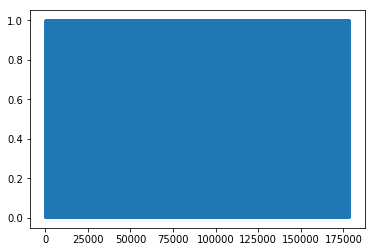

In [108]:
plt.plot(res)

In [109]:
result_RFC = np.where(res>0,1,0)

In [110]:
result_RFC.sum()

48055

In [111]:
delivery_RFC= pd.DataFrame()

In [112]:
delivery_RFC["prediction_id"]=Z["prediction_id"]

In [113]:
delivery_RFC["class"]=result_RFC

In [114]:
delivery_RFC.to_csv("delivery_RFC.csv", index=False, header=True)

# Tree

In [115]:
from sklearn import tree

In [116]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(X_input, X_output)

In [117]:
prediction = tree_model.predict(Z)

In [118]:
prediction

array([1, 0, 0, ..., 1, 0, 0])

In [119]:
len(prediction)

178685

In [120]:
tree_prediction = pd.DataFrame()

In [121]:
tree_prediction ["prediction_id"]=Z["prediction_id"]

In [122]:
tree_prediction["class"]=prediction

In [123]:
tree_prediction.to_csv("tree_prediction", index=False, header=True)

In [124]:
tree_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178685 entries, 123381 to 43533
Data columns (total 2 columns):
prediction_id    178685 non-null object
class            178685 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.1+ MB


# Logistic Regression

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_input, X_output,test_size=0.25, random_state=1234)

In [127]:
model = LogisticRegression()

In [128]:
model = model.fit (X_train,y_train)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [129]:
pd.DataFrame(data= np.transpose(model.coef_), index=X_train.columns )

,0
codmes,-7.793033e-06
codtarget,4.116382e-08
cem,3.908610e-06
ingreso_neto,-6.663779e-06
linea_ofrecida,-5.016049e-05
codday,-4.188634e-10
simu_prestamo,-2.266049e-10
benefit,-1.646081e-10
email,-1.228519e-09
facebook,8.780500e-10


In [141]:
probability =pd.DataFrame(model.predict_proba(X_test))
probs = probability.groupby(by="id_persona")
print (probs)

KeyError: 'id_persona'

In [131]:
predicted = model.predict(X_test)

In [192]:
predicted.sum()

0

In [134]:
from scipy.optimize import differential_evolution
df=pd.DataFrame(data=y_train)
res = df.join(probability.rename("probs"), on="id_persona")
optimization = differential_evolution(lambda c: -((res.probs > c[0]) * res.margen / res.margen.sum()).sum(), [(0, 1)])
optimization

AttributeError: 'numpy.ndarray' object has no attribute 'rename'

In [181]:
print (metrics.confusion_matrix(y_test, predicted))

[[33804     0]
 [ 7660     0]]


In [182]:
print (metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90     33804
           1       0.00      0.00      0.00      7660

   micro avg       0.82      0.82      0.82     41464
   macro avg       0.41      0.50      0.45     41464
weighted avg       0.66      0.82      0.73     41464



/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Logistic Regression 2: on credit cards acceptance

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [143]:
A = rcc_.join(vehicular_, on="id_persona")

In [144]:
A.head()

,mto_saldo,rango_mora,marca
id_persona,,,
1,4723.769674,1.0,NaN
2,7762.012233,1.0,NaN
3,1108.590501,1.0,NaN
4,3112.636050,1.0,NaN
5,7701.043197,1.0,NaN


In [145]:
A.fillna("0", inplace=True)

In [146]:
A = A.join(train["codtarget"], on="id_persona")

In [147]:
A.dropna(inplace=True, axis=0)

In [148]:
A

,mto_saldo,rango_mora,marca,codtarget
id_persona,,,,
1,4723.769674,1,0,0.0
2,7762.012233,1,0,1.0
3,1108.590501,1,0,0.0
4,3112.636050,1,0,0.0
5,7701.043197,1,0,0.0
6,623.181436,2.92857,1,0.0
7,1376.594776,1,0,0.0
8,13992.095238,1,0,0.0
9,706.392362,1,0,0.0


In [149]:
x = A.drop(columns=["codtarget"])
y = A["codtarget"].astype(int)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.25, random_state=1234)

In [151]:
model = LogisticRegression()

In [152]:
model = model.fit (X_train,y_train)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [153]:
pd.DataFrame(data= np.transpose(model.coef_), index=X_train.columns )

,0
mto_saldo,-0.000001
rango_mora,-0.813936
marca,-0.145470


In [154]:
predicted = model.predict(X_test)

In [155]:
predicted.sum()

0

In [157]:
from sklearn.neighbors import KNeighborsClassifier

In [158]:
knn6 = KNeighborsClassifier(n_neighbors=6)

In [159]:
knn6

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [160]:
knn6.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [161]:
y_pred = knn6.predict(X_test)
#printing the results
print(knn6.predict(X_test))

[0 0 0 ... 0 0 0]


In [163]:
y_pred.sum()

264

In [164]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[42690   226]
 [ 7253    38]]


In [165]:
from sklearn.metrics import accuracy_score
print("accuracy score=",accuracy_score(y_test,y_pred),"\n")

accuracy score= 0.851036708028761 



In [166]:
cross_val = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=100)

print (cross_val)

print (cross_val.mean())

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/skl

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/skl

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/skl

[0.8541563  0.8541563  0.8541563  0.8541563  0.8541563  0.8541563
 0.8541563  0.8541563  0.8541563  0.8541563  0.8541563  0.8541563
 0.8541563  0.8541563  0.8541563  0.8541563  0.8541563  0.8541563
 0.8541563  0.8541563  0.8541563  0.8541563  0.8541563  0.8541563
 0.8541563  0.8541563  0.8541563  0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367
 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367 0.85408367

In [172]:
# importing GridSearchCV algorithm from the model_selection sub-module of scikit learn
from sklearn.model_selection import GridSearchCV
#Define an object containing hyperparameter name and potential values as key-value pairs
hyperparameter_values = {'n_neighbors':[10,15,20,30,50], 'leaf_size':[20,25,30,35,40]}

In [173]:
# Instantiating the GridSearchCV algorithm
gs=GridSearchCV(KNeighborsClassifier(),hyperparameter_values,cv=10)
# fitting the data
gs.results=gs.fit(x,y)

In [174]:
print('Best estimator/model: ',gs.results.best_estimator_)
print('Best parameter combination: ',gs.results.best_params_)
print('Best accuracy score: ',gs.results.best_score_)

Best estimator/model:  KNeighborsClassifier(algorithm='auto', leaf_size=20, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')
Best parameter combination:  {'leaf_size': 20, 'n_neighbors': 30}
Best accuracy score:  0.8541032829251047


In [175]:
knn20 = KNeighborsClassifier(n_neighbors=20, leaf_size=30)

In [176]:
knn20.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

In [177]:
y_pred = knn20.predict(X_test)
#printing the results
print(knn20.predict(X_test))

[0 0 0 ... 0 0 0]


In [178]:
y_pred.sum()

2

In [179]:
print(confusion_matrix(y_test,y_pred))

[[42914     2]
 [ 7291     0]]


# Random

In [189]:
r_=np.random.binomial??

In [197]:
r_=np.random.binomial(1, 0.1465, size=178685)
print(r_)

[0 0 0 ... 0 0 0]


In [198]:
r_.sum()

26303

In [182]:
r = np.random.randint(2, size=178685)

In [199]:
r_prediction = pd.DataFrame()

In [200]:
r_prediction ["prediction_id"]=Z["prediction_id"]

In [201]:
r_prediction["class"]=r_

In [202]:
r_prediction.to_csv("r_prediction", index=False, header=True)

In [203]:
r_prediction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178685 entries, 123381 to 43533
Data columns (total 2 columns):
prediction_id    178685 non-null object
class            178685 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.1+ MB


# Last Try

In [200]:
rcc_2.tail()

,codmes,id_persona,cod_banco,producto,clasif,mto_saldo,rango_mora
11705548,201801,54243,40,5,0.0,48.9100,1.0
11705549,201901,206686,40,5,0.0,729.7737,1.0
11705550,201901,91109,36,8,NaN,1533.0000,NaN
11705551,201903,64886,40,8,NaN,4088.0000,NaN
11705552,201810,74399,36,2,0.0,5377.4647,1.0


In [201]:
rcc_2["id_persona"].nunique()

237808

In [202]:
rcc_2 = rcc_2.groupby(by="id_persona").agg({"cod_banco": 'mean', "producto": "count", "mto_saldo": 'sum', "rango_mora": 'mean'}) 

In [203]:
L = train_.join(rcc_2, on="id_persona")

In [204]:
G = test.join(rcc_2, on="id_persona")

In [205]:
L.head()

,codmes,codtarget,cem,ingreso_neto,linea_ofrecida,margen,cod_banco,producto,mto_saldo,rango_mora
id_persona,,,,,,,,,,
1,201904,0,1140.0,6607.0,30900,-10.0,32.805556,72.0,340111.4165,1.0
2,201901,0,1.0,1735.0,1700,-5.0,28.959184,49.0,380338.5994,1.0
3,201904,0,327.0,4707.0,4500,-15.0,28.350000,80.0,88687.2401,1.0
4,201904,0,52.0,1700.0,1000,-5.0,14.000000,40.0,124505.4420,1.0
5,201902,0,1.0,5324.0,5200,-10.0,28.000000,33.0,254134.4255,1.0


In [206]:
L.drop(["codmes"], axis=1, inplace=True)

In [207]:
L.fillna("0", inplace=True)

In [208]:
L[["cod_banco", "mto_saldo"]]= L[["cod_banco","mto_saldo"]].astype(int)

In [209]:
L.drop(columns=["margen"], inplace=True)

In [210]:
G.head()

,codmes,id_persona,cem,ingreso_neto,linea_ofrecida,prediction_id,cod_banco,producto,mto_saldo,rango_mora
0,201907,123381,1.0,1340.0,2600,123381_201907,37.887640,89.0,3.973997e+05,1.000000
1,201906,125277,1412.0,3166.0,4700,125277_201906,52.000000,5.0,3.054211e+03,1.000000
2,201906,9564,389.0,2575.0,5100,9564_201906,18.276923,65.0,1.521707e+05,1.036364
3,201906,249494,302.0,1355.0,1300,249494_201906,40.227273,44.0,2.813352e+04,1.550000
4,201907,131234,2130.0,10486.0,52400,131234_201907,23.593750,64.0,3.314482e+06,1.024390


In [211]:
G.drop(["codmes"], axis=1, inplace=True)

In [212]:
G.index=G["id_persona"]

In [213]:
G.drop(["id_persona"], axis=1, inplace=True)

In [214]:
G.head()

,cem,ingreso_neto,linea_ofrecida,prediction_id,cod_banco,producto,mto_saldo,rango_mora
id_persona,,,,,,,,
123381,1.0,1340.0,2600,123381_201907,37.887640,89.0,3.973997e+05,1.000000
125277,1412.0,3166.0,4700,125277_201906,52.000000,5.0,3.054211e+03,1.000000
9564,389.0,2575.0,5100,9564_201906,18.276923,65.0,1.521707e+05,1.036364
249494,302.0,1355.0,1300,249494_201906,40.227273,44.0,2.813352e+04,1.550000
131234,2130.0,10486.0,52400,131234_201907,23.593750,64.0,3.314482e+06,1.024390


In [215]:
G.fillna("0", inplace=True)
G[["cod_banco", "mto_saldo"]]= G[["cod_banco","mto_saldo"]].astype(int)

In [216]:
L_train, L_test, l_train, l_test = train_test_split(L.drop("codtarget", axis=1), L["codtarget"],test_size=0.25, random_state=1234)

In [217]:
RFR_3 = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.000001, min_impurity_split=None,
           min_samples_leaf=1000, min_samples_split=1000,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [218]:
# Create the model on train dataset
RFR_3 = RFR_3.fit(X=L_train, y=l_train)

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [219]:
print(RFR_3.feature_importances_)

[0.02956879 0.1124875  0.12733804 0.01197748 0.04185098 0.52773869
 0.14903852]


In [220]:
L_train.head()

,cem,ingreso_neto,linea_ofrecida,cod_banco,producto,mto_saldo,rango_mora
id_persona,,,,,,,
84679,472.0,1653.0,3300,24,67,54273,1
172732,264.0,3318.0,14900,48,106,484859,1
147987,1384.0,3166.0,1500,34,33,13506,1.03846
124441,848.0,7997.0,39900,38,69,2215043,1
245514,331.0,1084.0,1000,16,33,46733,1


In [221]:
G.head()

,cem,ingreso_neto,linea_ofrecida,prediction_id,cod_banco,producto,mto_saldo,rango_mora
id_persona,,,,,,,,
123381,1.0,1340.0,2600,123381_201907,37,89,397399,1
125277,1412.0,3166.0,4700,125277_201906,52,5,3054,1
9564,389.0,2575.0,5100,9564_201906,18,65,152170,1.03636
249494,302.0,1355.0,1300,249494_201906,40,44,28133,1.55
131234,2130.0,10486.0,52400,131234_201907,23,64,3314481,1.02439


In [222]:
result = RFR_3.predict(G.drop("prediction_id", axis=1))

In [223]:
result

array([0.06334441, 0.31944149, 0.22758147, ..., 0.2749373 , 0.36168882,
       0.12179759])

In [224]:
len(result)

178685

In [225]:
result_ = np.where(result <0.33, 1, 0)

In [226]:
result_.sum()

152590

In [227]:
delivery= pd.DataFrame()

In [228]:
delivery["prediction_id"]=G["prediction_id"]

In [229]:
delivery["class"]=result_

In [230]:
delivery.to_csv("delivery_RFR3.csv", index=False, header=True)